<a href="https://colab.research.google.com/github/codingshinobi/mlprojects/blob/gh-pages/Banks_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context** - 
    Tele-marketing was first initiated to make customers familiar with the products/ services a firm is offering and to get the customers to purchase that product/ service. This lead to helping the firm in the banking sector to grow their customer count by establishing interest in them with some attractive deals which couldn’t be refused. This led the banks to step into marketing to customers about their term deposits.

**Content**- 
    This project considers real data from a Tele-Marketing campaign that was done by Portuguese bank from May 2008 – November 2010, this data has been extracted from the UCI Machine Learning Repository. From that source we extracted two data sets namely “bank-additional-full.csv”,” bank-additional.csv” where the first file is consisting of 41188 records and 21 inputs which we have chosen for the training of the data, whereas the second one is consisting of 4119 and 21 inputs is b been chosen for testing of the data.

To find -
Predict whether a client of a bank will subscribe to a term deposit or not
finding customer patterns such that banks can plan the different campaigns for different customers according to the patterns.



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# looking the data in table format      
train_df = pd.read_csv('train.csv', sep=';')
test_df = pd.read_csv('test.csv', sep = ';')

In [4]:
#joining the datasets to get ample number of samples
train_df = pd.concat([train_df,test_df])

In [5]:
#first 5 rows
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# looking for missing data
train_df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Descriptive statistics

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [8]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#EXPLORATORY DATA ANALYSIS

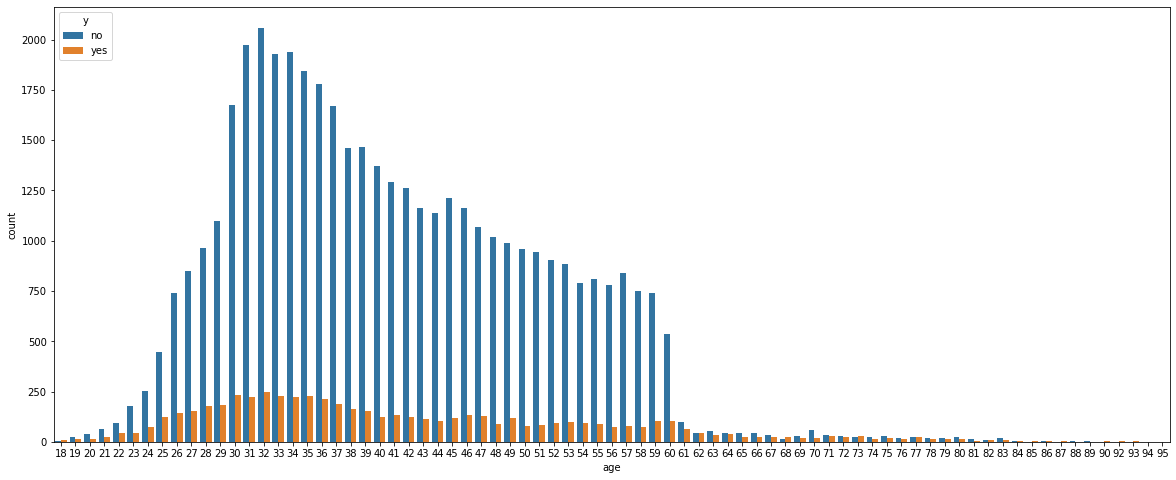

In [9]:
# age levels of the people in the dataset
fig = plt.subplots(figsize = (20,8))
sns.countplot(x= 'age', hue= 'y', data= train_df)

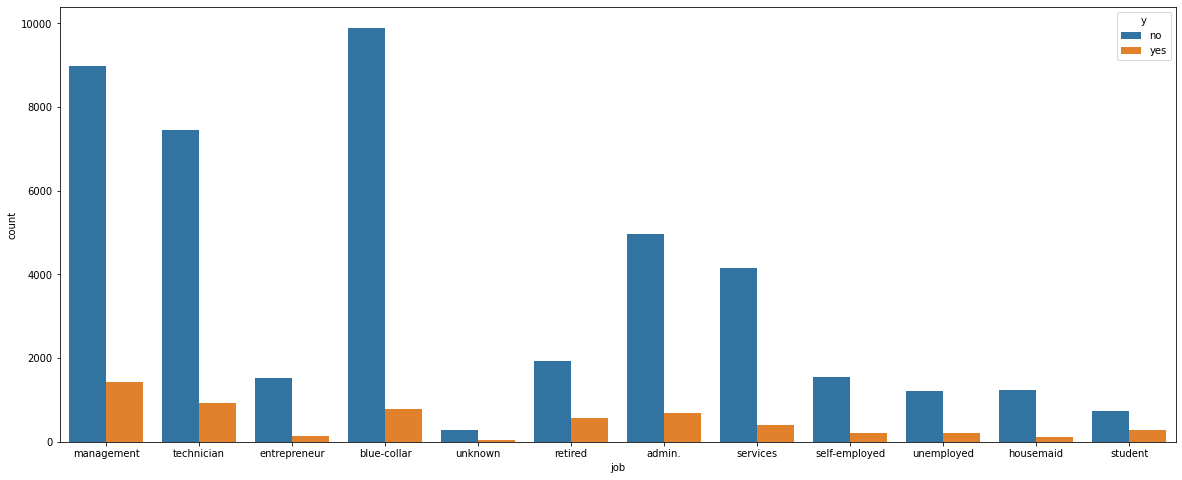

In [10]:
# checking the jobs of the customers
fig= plt.subplots(figsize=(20,8))
sns.countplot(x='job', hue= 'y', data = train_df)

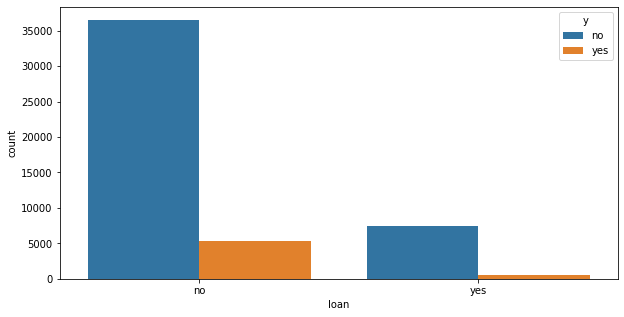

In [11]:
#loan data
fig= plt.subplots(figsize=(10,5))
sns.countplot(x='loan', hue= 'y', data = train_df)

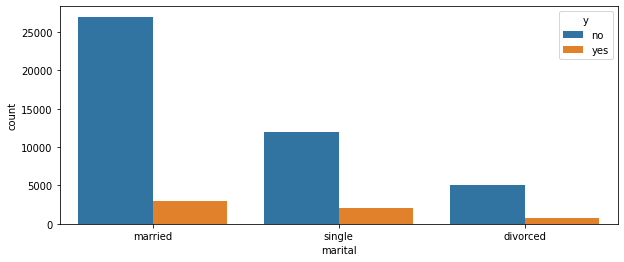

In [12]:
fig= plt.subplots(figsize=(10,4))
sns.countplot(x='marital', hue= 'y', data = train_df)

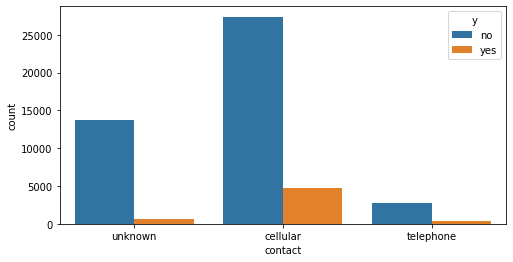

In [13]:
fig= plt.subplots(figsize=(8,4))
sns.countplot(x='contact', hue= 'y', data = train_df)

We can't see no real insights that could point us to a direction on which feature would provide the best predictability.
So let's start preparing the data for machine learning algorithms.
Lets start by getting the dummy variables and label encoders for features and labels.



#Data Preprocessing

In [14]:
train_df['age'].mean()

40.95747205018901

In [15]:
train_df.job.value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [16]:
train_df.marital.value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

In [17]:
train_df[['married','single','divorced']] = pd.get_dummies(train_df.marital)

In [18]:
train_df.education.value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

In [19]:
train_df[['secondary','tertiary','primary','unknown']] = pd.get_dummies(train_df.education)

In [20]:
train_df.default.value_counts()

no     48841
yes      891
Name: default, dtype: int64

In [21]:
train_df[['default_y','default_n']] = pd.get_dummies(train_df.default)

In [22]:
train_df.housing.value_counts()

yes    27689
no     22043
Name: housing, dtype: int64

In [23]:
train_df[['housing_y','housing_n']] = pd.get_dummies(train_df.housing)

In [24]:
train_df.loan.value_counts()

no     41797
yes     7935
Name: loan, dtype: int64

In [25]:
train_df[['loan_y','loan_n']] = pd.get_dummies(train_df.loan)

In [26]:
train_df.contact.value_counts()

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

In [27]:
train_df[['unknown','cellular','telephone']] = pd.get_dummies(train_df.contact)

In [28]:
train_df.poutcome.value_counts()

unknown    40664
failure     5391
other       2037
success     1640
Name: poutcome, dtype: int64

In [29]:
train_df[['unknown','failure','other','success']] = pd.get_dummies(train_df.poutcome)

In [30]:
train_df.y.value_counts()

no     43922
yes     5810
Name: y, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
train_df['y'] = label_enc.fit_transform(train_df['y'])

In [32]:
label = train_df['y']

In [33]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single,divorced,secondary,tertiary,primary,unknown,default_y,default_n,housing_y,housing_n,loan_y,loan_n,cellular,telephone,failure,other,success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1


In [34]:
num_cols = list(train_df.dtypes[train_df.dtypes != 'object'].index)

In [35]:
num_cols

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'married',
 'single',
 'divorced',
 'secondary',
 'tertiary',
 'primary',
 'unknown',
 'default_y',
 'default_n',
 'housing_y',
 'housing_n',
 'loan_y',
 'loan_n',
 'cellular',
 'telephone',
 'failure',
 'other',
 'success']

In [36]:
train_new = train_df[num_cols].drop(['y'], axis=1)
train_new.head()

,age,balance,day,duration,campaign,pdays,previous,married,single,divorced,secondary,tertiary,primary,unknown,default_y,default_n,housing_y,housing_n,loan_y,loan_n,cellular,telephone,failure,other,success
0,58,2143,5,261,1,-1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(train_new.values, label.values, test_size= 0.2,
                                                random_state = 42)

In [38]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(39785, 25) (9947, 25) (39785,) (9947,)


In [39]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( C= 2, max_iter= 500)
log_reg.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
ypred = log_reg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
#metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score
acc_score = accuracy_score(ypred, ytest)
precision_score = precision_score(ypred,ytest)
f1_score = f1_score(ytest,ypred)
print(acc_score, 
      precision_score, 
      f1_score)


0.9030863576957877 0.3006081668114683 0.41787439613526567


In [42]:
from sklearn.metrics import roc_curve
curve = roc_curve(ypred, ytest)
curve

(array([0.        , 0.08525736, 1.        ]),
 array([0.        , 0.68514851, 1.        ]),
 array([2, 1, 0]))

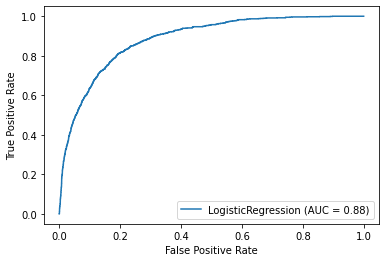

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg, xtest, ytest)
plt.show()

In [44]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state = 100, max_depth = 5)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [45]:
ypred_dt = clf.predict(xtest)
ypred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
tree_acc_score = accuracy_score(ytest, ypred_dt)
tree_acc_score

0.9050970141751282

In [47]:
from sklearn import metrics
tree_precision_score = metrics.precision_score(ypred_dt, ytest)
tree_precision_score

0.30755864465682015

In [48]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(alpha = 0.2, random_state = 100)
sgd_clf.fit(xtrain,ytrain)

SGDClassifier(alpha=0.2, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=100, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
sgd_pred = sgd_clf.predict(xtest)
sgd_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
accuracy_score(ytest, sgd_pred)*100

88.43872524379209

In [51]:
accuracy_score(ytest, sgd_pred)

0.8843872524379209

In [52]:
metrics.precision_score(ytest, sgd_pred)

0.5015384615384615

Lets try Random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rnd_classifier = RandomForestClassifier()
rnd_classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rnd_predict = rnd_classifier.predict(xtest)

In [55]:
accuracy_score(ytest, rnd_predict)

0.9160550919875339

In [56]:
precision_score = metrics.precision_score(ytest,rnd_predict)
precision_score

0.7158469945355191

In [57]:
from sklearn.metrics import recall_score
recall_score(ytest, rnd_predict)

0.45525629887054736

ENSEMBLE LEARNING


In [58]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators= [('lr', log_reg ), ('dt', clf), ('sgd', sgd_clf), ('rnd', rnd_classifier)],
    voting= 'hard'
)
voting_clf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=2, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=500,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [59]:
vot_pred = voting_clf.predict(xtest)
vot_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
accuracy_score(ytest, vot_pred)

0.9036895546395898

In [61]:
metrics.precision_score(ytest, vot_pred)

0.7615176151761518

In [62]:
metrics.recall_score(ytest, vot_pred)

0.24413553431798435

Bagging Classifier

In [63]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1, random_state = 100
 )
bag_clf.fit(xtrain, ytrain)
y_pred = bag_clf.predict(xtest)

In [64]:
metrics.confusion_matrix(ytest, y_pred)

array([[8623,  173],
       [ 789,  362]])

In [65]:
accuracy_score(ytest, y_pred)

0.9032874233437217

In [66]:
metrics.precision_score(ytest,y_pred)

0.6766355140186916

In [67]:
metrics.recall_score(ytest, y_pred)*100

31.4509122502172

In [68]:
metrics.f1_score(ytest, y_pred)*100

42.94187425860024

#CONCLUSION
Voting classifier with 76% precision score and 90% accuracy score is the best model which can predict if the customer will subsribe to term deposit or not. If customer dosen't subsbribe then Banks will design their marketing campaigns accordingly. 